# Classify wines into quality categories

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import zscore

In [2]:
df = pd.read_csv("../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
df = df.drop_duplicates()
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Quality column

We're missing data about vines whose quality is: 1, 2, 9, 10. This indicates that we might have problem predicting vines from this values (for examples not from the dataset).

In [7]:
qualities = df.quality.sort_values().unique()
qualities

array([3, 4, 5, 6, 7, 8])

The data is also extremely imbalanced: we have many wines whose quality is 5-6, but very small number of wines whose quality is 3, 8.

Text(0.5, 1.0, 'Wine distribution by quality')

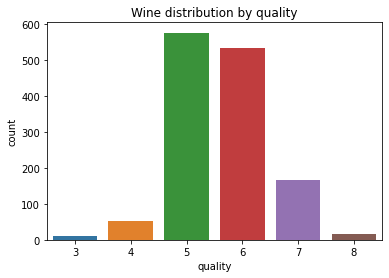

In [8]:
sns.countplot(x="quality", data=df).set_title("Wine distribution by quality")

In [9]:
(df.quality.value_counts(normalize=True) * 100)

5    42.457689
6    39.367182
7    12.288447
4     3.899926
8     1.250920
3     0.735835
Name: quality, dtype: float64

## Examine columns

### Fixed acidity

Most acids involved with wine or fixed or nonvolatile.

<AxesSubplot:xlabel='fixed acidity'>

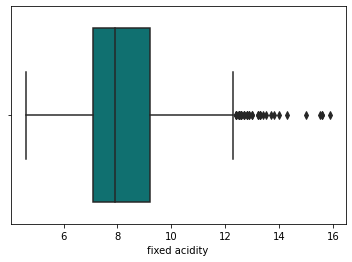

In [10]:
sns.boxplot(x=df["fixed acidity"], color='teal')

Higher quality of wine tend to have **higher** levels of 'fixed acidity':

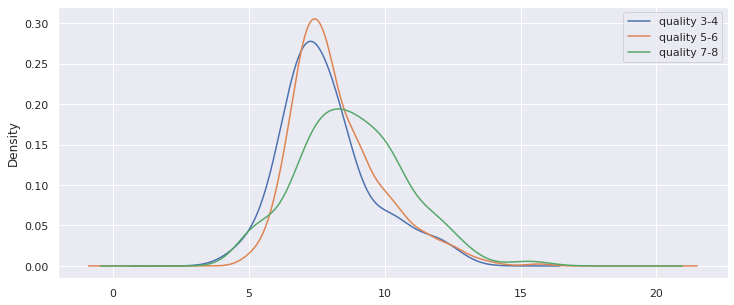

In [11]:
sns.set(rc={'figure.figsize':(12,5)})
df[(df["quality"] == 3) | (df["quality"] == 4)]["fixed acidity"].plot.kde(label="quality 3-4")
df[(df["quality"] == 5) | (df["quality"] == 6)]["fixed acidity"].plot.kde(label="quality 5-6")
df[(df["quality"] == 7) | (df["quality"] == 8)]["fixed acidity"].plot.kde(label="quality 7-8")
plt.legend()

### Volatile acidity

The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.

<AxesSubplot:xlabel='volatile acidity'>

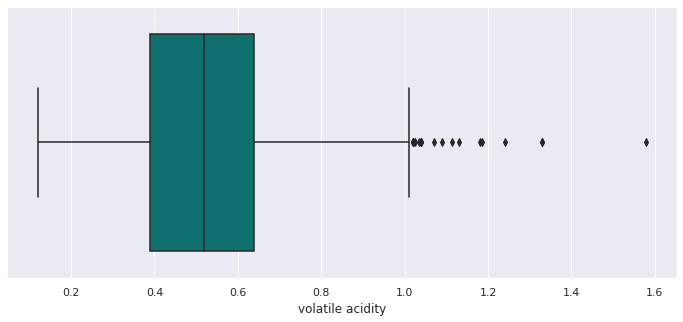

In [12]:
sns.boxplot(x=df["volatile acidity"], color='teal')

Higher quality wines tend to have **lower** levels of 'volatile acidity':

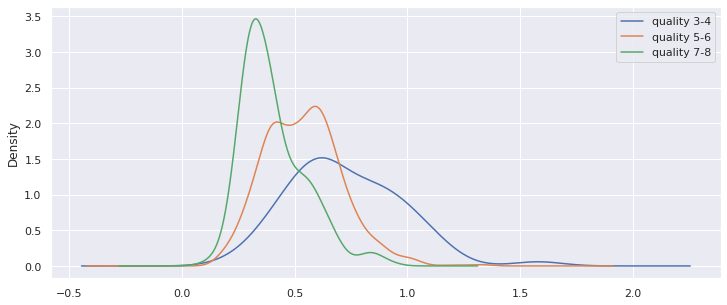

In [13]:
df[(df["quality"] == 3) | (df["quality"] == 4)]["volatile acidity"].plot.kde(label="quality 3-4")
df[(df["quality"] == 5) | (df["quality"] == 6)]["volatile acidity"].plot.kde(label="quality 5-6")
df[(df["quality"] == 7) | (df["quality"] == 8)]["volatile acidity"].plot.kde(label="quality 7-8")
plt.legend()

Text(0.5, 1.0, 'Volatile acidity value impact on vine quality')

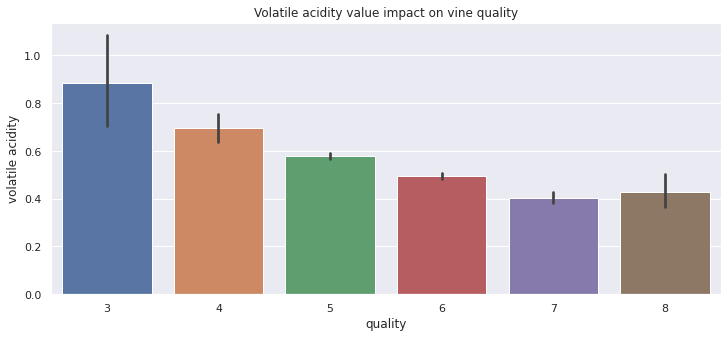

In [14]:
sns.barplot(x='quality',y='volatile acidity',data=df).set_title("Volatile acidity value impact on vine quality")

### Citric acid

Found in small quantities, citric acid can add 'freshness' and flavor to wines.

<AxesSubplot:xlabel='citric acid'>

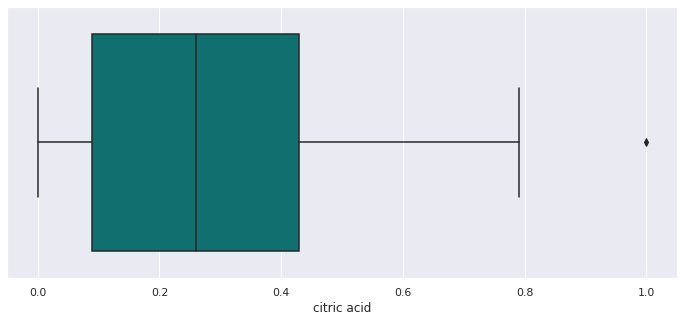

In [15]:
sns.boxplot(x=df["citric acid"], color='teal')

Higher quality wines tend to have higher values of 'citric acid':

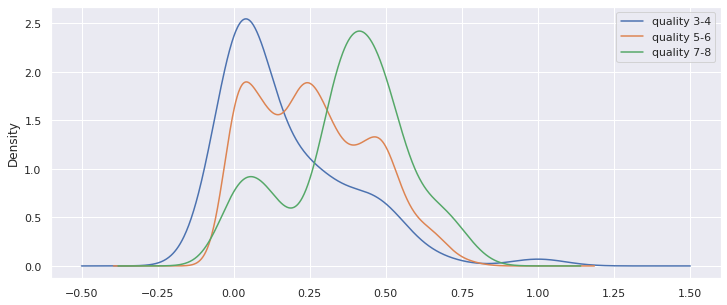

In [16]:
df[(df["quality"] == 3) | (df["quality"] == 4)]["citric acid"].plot.kde(label="quality 3-4")
df[(df["quality"] == 5) | (df["quality"] == 6)]["citric acid"].plot.kde(label="quality 5-6")
df[(df["quality"] == 7) | (df["quality"] == 8)]["citric acid"].plot.kde(label="quality 7-8")
plt.legend()

Text(0.5, 1.0, 'Citric acid value impact on vine quality')

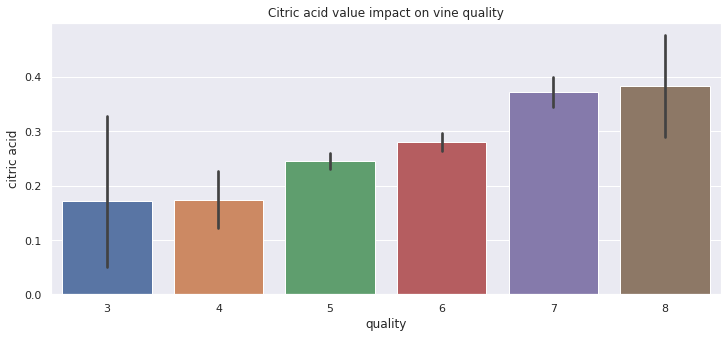

In [17]:
sns.barplot(x='quality',y='citric acid',data=df).set_title("Citric acid value impact on vine quality")

### Residual sugar

The amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.

<AxesSubplot:xlabel='residual sugar'>

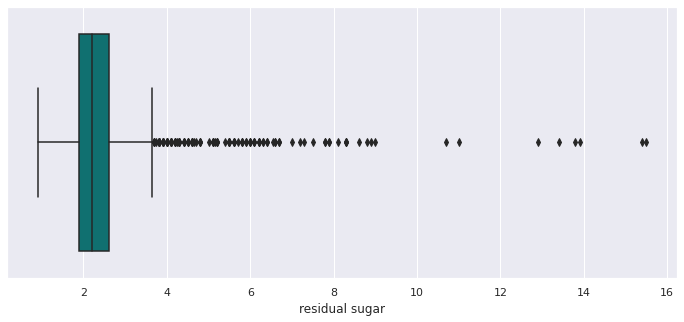

In [18]:
sns.boxplot(x=df["residual sugar"], color='teal')

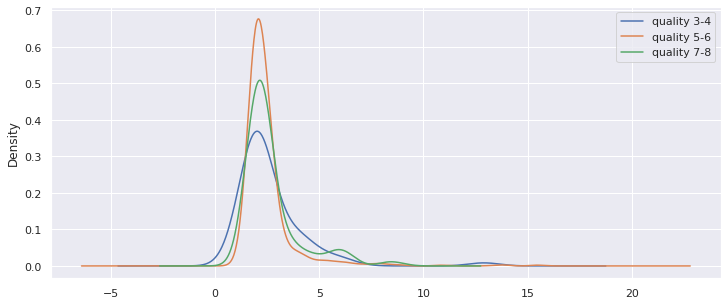

In [19]:
df[(df["quality"] == 3) | (df["quality"] == 4)]["residual sugar"].plot.kde(label="quality 3-4")
df[(df["quality"] == 5) | (df["quality"] == 6)]["residual sugar"].plot.kde(label="quality 5-6")
df[(df["quality"] == 7) | (df["quality"] == 8)]["residual sugar"].plot.kde(label="quality 7-8")
plt.legend()

### Chlorides

The amount of salt in the wine.

<AxesSubplot:xlabel='chlorides'>

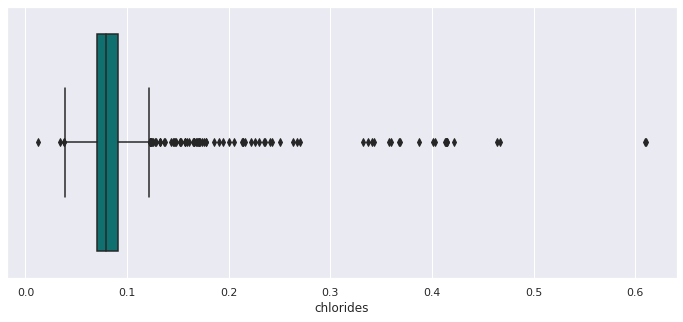

In [20]:
sns.boxplot(x=df["chlorides"], color='teal')

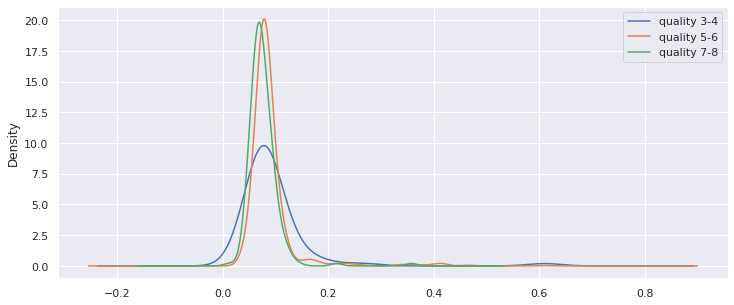

In [21]:
df[(df["quality"] == 3) | (df["quality"] == 4)]["chlorides"].plot.kde(label="quality 3-4")
df[(df["quality"] == 5) | (df["quality"] == 6)]["chlorides"].plot.kde(label="quality 5-6")
df[(df["quality"] == 7) | (df["quality"] == 8)]["chlorides"].plot.kde(label="quality 7-8")
plt.legend()

### Free sulfur dioxide

The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.

<AxesSubplot:xlabel='free sulfur dioxide'>

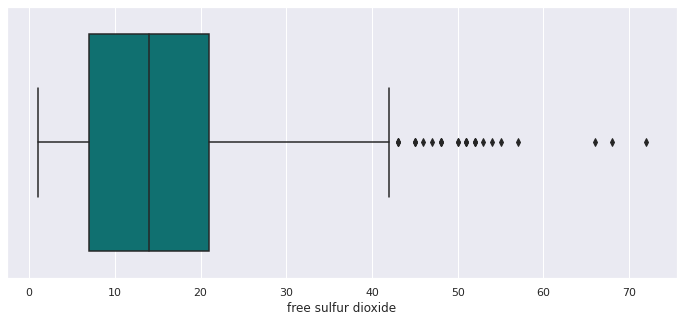

In [22]:
sns.boxplot(x=df["free sulfur dioxide"], color='teal')

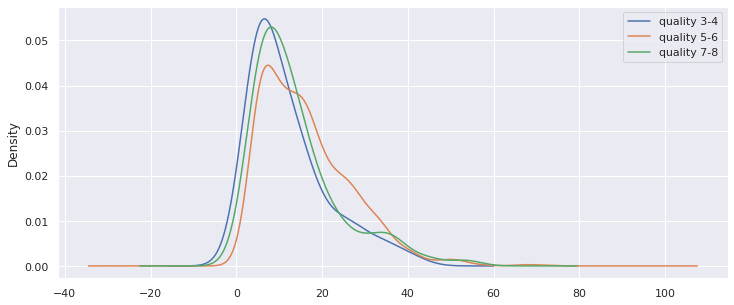

In [23]:
df[(df["quality"] == 3) | (df["quality"] == 4)]["free sulfur dioxide"].plot.kde(label="quality 3-4")
df[(df["quality"] == 5) | (df["quality"] == 6)]["free sulfur dioxide"].plot.kde(label="quality 5-6")
df[(df["quality"] == 7) | (df["quality"] == 8)]["free sulfur dioxide"].plot.kde(label="quality 7-8")
plt.legend()

### Total sulfur dioxide

Amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.

<AxesSubplot:xlabel='total sulfur dioxide'>

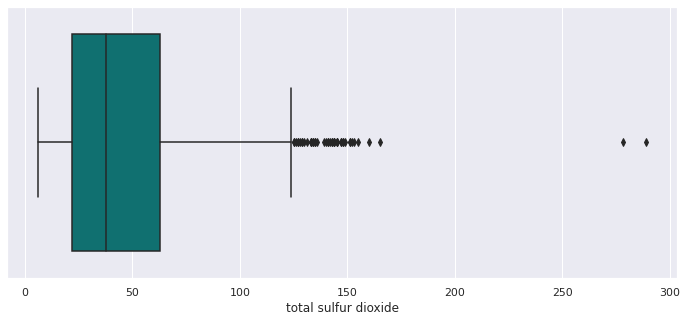

In [24]:
sns.boxplot(x=df["total sulfur dioxide"], color='teal')

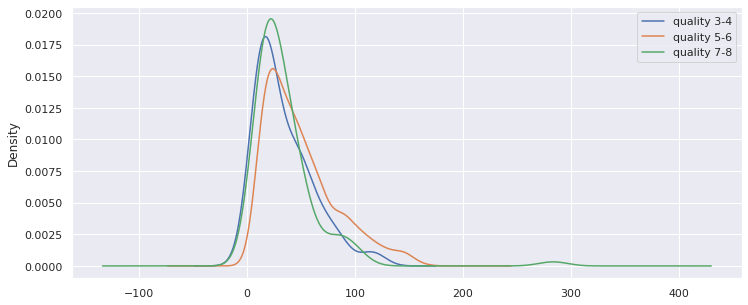

In [25]:
df[(df["quality"] == 3) | (df["quality"] == 4)]["total sulfur dioxide"].plot.kde(label="quality 3-4")
df[(df["quality"] == 5) | (df["quality"] == 6)]["total sulfur dioxide"].plot.kde(label="quality 5-6")
df[(df["quality"] == 7) | (df["quality"] == 8)]["total sulfur dioxide"].plot.kde(label="quality 7-8")
plt.legend()

### Density

The density of water is close to that of water depending on the percent alcohol and sugar content.

<AxesSubplot:xlabel='density'>

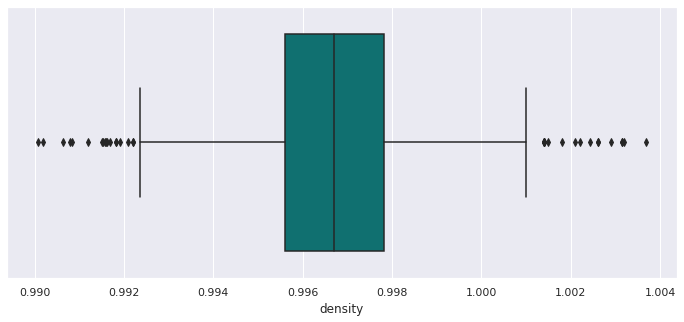

In [26]:
sns.boxplot(x=df["density"], color='teal')

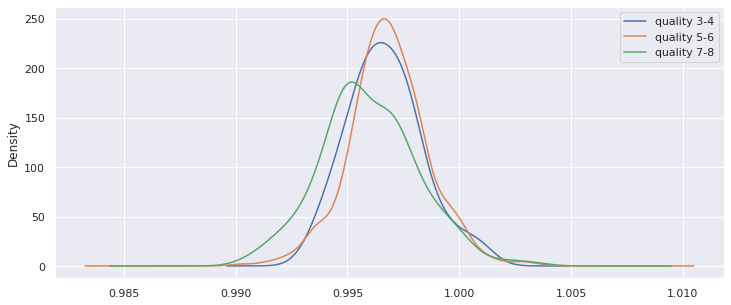

In [27]:
df[(df["quality"] == 3) | (df["quality"] == 4)]["density"].plot.kde(label="quality 3-4")
df[(df["quality"] == 5) | (df["quality"] == 6)]["density"].plot.kde(label="quality 5-6")
df[(df["quality"] == 7) | (df["quality"] == 8)]["density"].plot.kde(label="quality 7-8")
plt.legend()

### pH

Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.

<AxesSubplot:xlabel='pH'>

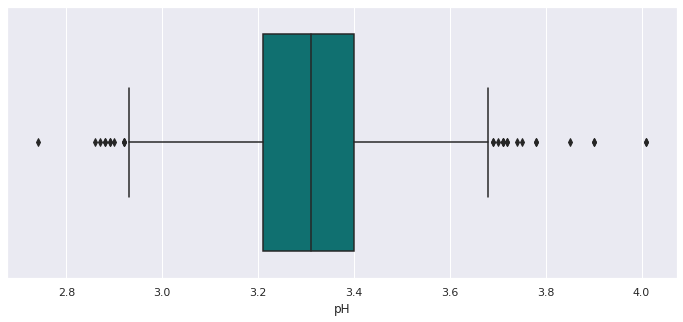

In [28]:
sns.boxplot(x=df["pH"], color='teal')

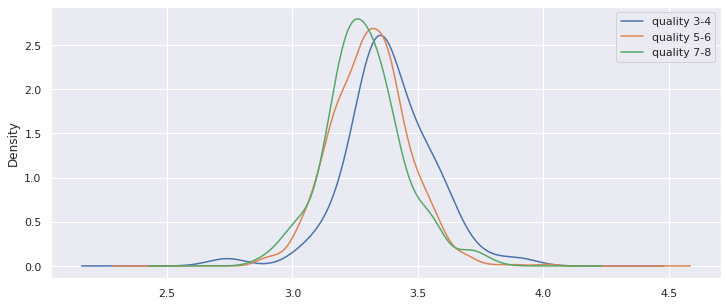

In [29]:
df[(df["quality"] == 3) | (df["quality"] == 4)]["pH"].plot.kde(label="quality 3-4")
df[(df["quality"] == 5) | (df["quality"] == 6)]["pH"].plot.kde(label="quality 5-6")
df[(df["quality"] == 7) | (df["quality"] == 8)]["pH"].plot.kde(label="quality 7-8")
plt.legend()

### Sulphates

A wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant.

<AxesSubplot:xlabel='sulphates'>

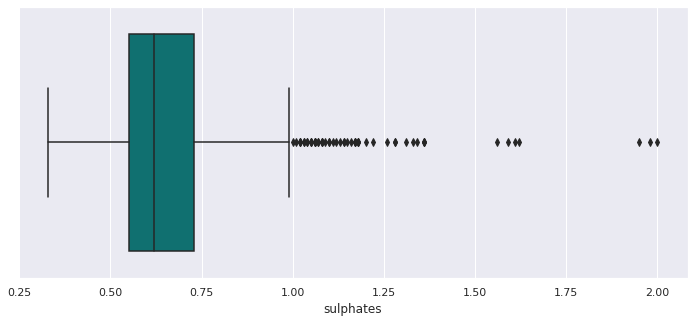

In [30]:
sns.boxplot(x=df["sulphates"], color='teal')

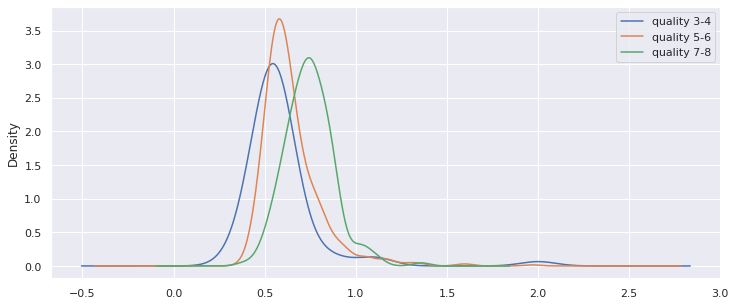

In [31]:
df[(df["quality"] == 3) | (df["quality"] == 4)]["sulphates"].plot.kde(label="quality 3-4")
df[(df["quality"] == 5) | (df["quality"] == 6)]["sulphates"].plot.kde(label="quality 5-6")
df[(df["quality"] == 7) | (df["quality"] == 8)]["sulphates"].plot.kde(label="quality 7-8")
plt.legend()

## Correlation

Correlation to 'quality' value:
quality                 1.000000
alcohol                 0.480343
volatile acidity       -0.395214
sulphates               0.248835
citric acid             0.228057
density                -0.184252
total sulfur dioxide   -0.177855
chlorides              -0.130988
fixed acidity           0.119024
pH                     -0.055245
free sulfur dioxide    -0.050463
residual sugar          0.013640
Name: quality, dtype: float64


[Text(0.5, 0, 'fixed acidity'),
 Text(1.5, 0, 'volatile acidity'),
 Text(2.5, 0, 'citric acid'),
 Text(3.5, 0, 'residual sugar'),
 Text(4.5, 0, 'chlorides'),
 Text(5.5, 0, 'free sulfur dioxide'),
 Text(6.5, 0, 'total sulfur dioxide'),
 Text(7.5, 0, 'density'),
 Text(8.5, 0, 'pH'),
 Text(9.5, 0, 'sulphates'),
 Text(10.5, 0, 'alcohol'),
 Text(11.5, 0, 'quality')]

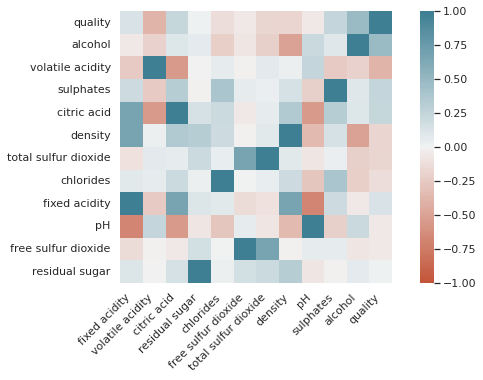

In [32]:
sns.set(rc={'figure.figsize':(10,5)})
corr = df.corr().sort_values(ascending=False, key=lambda x: abs(x), by="quality")

print("Correlation to 'quality' value:")
print (corr["quality"])

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

From the heatmap we can learn that high-quality vines tend to have:
1. **High** alcohol percentage
2. **Low** volatile acidity
3. **High** sulphates
4. **High** citric acid

## Drop columns

We should also consider removing the columns that have low correlation with the quality column:
1. pH
2. free sulfur dioxide
3. residual sugar

In [33]:
df = df.drop(columns=["pH", "free sulfur dioxide", "residual sugar"])

## Standartization

In [34]:
standarized_df = round((df-df.mean())/df.std(), 3)
standarized_df

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,-0.524,0.932,-1.393,-0.246,-0.384,0.584,-0.578,-0.954,-0.757
1,-0.294,1.915,-1.393,0.200,0.604,0.049,0.125,-0.584,-0.757
2,-0.294,1.259,-1.188,0.079,0.215,0.156,-0.051,-0.584,-0.757
3,1.663,-1.363,1.471,-0.266,0.394,0.691,-0.461,-0.584,0.457
5,-0.524,0.713,-1.393,-0.266,-0.204,0.584,-0.578,-0.954,-0.757
...,...,...,...,...,...,...,...,...,...
1593,-0.870,0.495,-0.984,-0.408,-0.264,-0.106,0.945,-0.862,0.457
1594,-1.215,0.385,-0.984,0.038,-0.085,-0.968,-0.461,0.063,-0.757
1595,-1.388,0.112,-0.881,-0.529,0.125,-0.850,0.594,0.709,0.457
1597,-1.388,0.631,-0.779,-0.266,-0.085,-0.663,0.301,-0.215,-0.757


<AxesSubplot:>

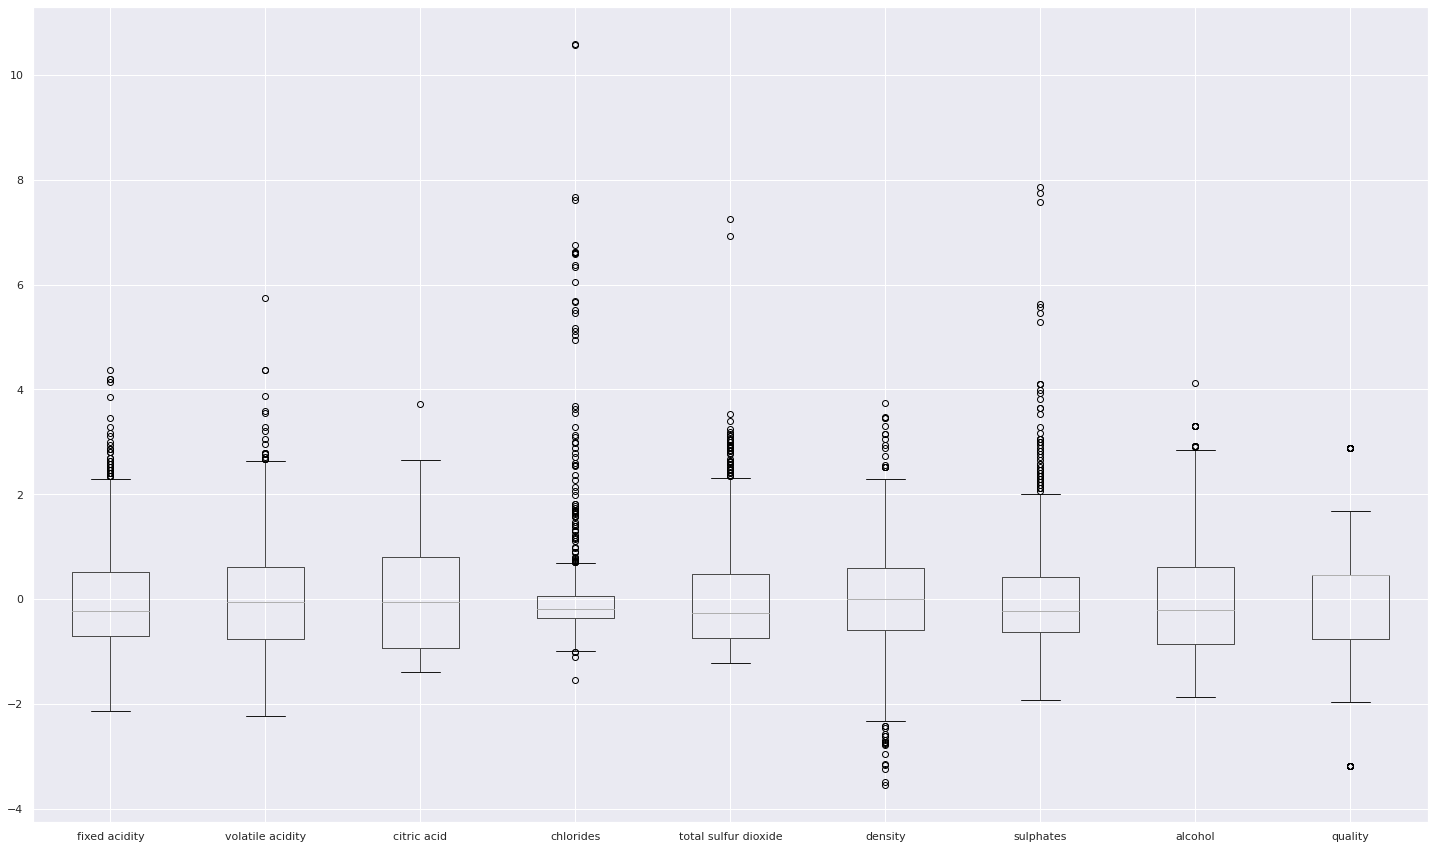

In [35]:
sns.set(rc={'figure.figsize':(25,15)})
standarized_df.boxplot()

## Train a model

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score

df_train = standarized_df.drop(columns=["quality"])
X_train, X_test, y_train, y_test = train_test_split(df_train,df["quality"],test_size=0.2,shuffle=True, stratify=df["quality"])

pipeline =  SVC(gamma="auto", C=3)
pipeline.fit(X_train, y_train)

predictions = pipeline.predict(X_test)
print(classification_report(y_test, predictions))
print(f"Accuracy: {accuracy_score(y_test, predictions)}")

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       1.00      0.09      0.17        11
           5       0.65      0.78      0.71       116
           6       0.57      0.62      0.59       107
           7       0.67      0.30      0.42        33
           8       0.00      0.00      0.00         3

    accuracy                           0.62       272
   macro avg       0.48      0.30      0.31       272
weighted avg       0.62      0.62      0.59       272

Accuracy: 0.6176470588235294
